# Unsupervised Learning: Discovering Patterns From The Unknown

## What is it?
- It is a branch of machine learning where algorithms learn from unlabeled data. 
- Unlike supervised learning, where data is pre-categorized, unsupervised learning models discover patterns and structures within the data on their own.
- It enables algorithms to work independently to discover hidden information in the data without guidance.
- It classifies unsorted information according to patterns, differences, or similarities.

**Example**</br>
Imagine you have a box of mixed fruits but no labels. Unsupervised learning would be like asking a computer to sort these fruits into groups based on their similarities, without telling it what the fruits are.

## Types of Unsupervised Learning
- **Clustering** Grouping similar data points together. e.g. grouping fruits based on similar color, shape, texture, etc... grouping customers based on purchasing behavior
- **Dimensionality Reduction** Simplifying/summarizing the number of features (dimensions) while preserving their essential information. It's mainly used for visualization, interpretation, and performance optimization (speed).
- **Association** Discovering relationships between items. e.g. Recommendation engines (people who buy bread often buy a toaster)
</br>

**Real World Applications:**
- Customer Segmentation: launching customized marketing campaign for different segments of customers based on behavior and demographics
- Image Classification (no label): Cluster images based on common features
- Anomaly Detection: Spotting unusual data points that might indicate an anomaly (fraud or system attacks)
- Recommendation Systems: providing proper recommendation based on suer preference

## Clustering

## Types of Clustering Algorithms
- **Centroid-Based Clustering** 
    - K-Means Clustering: 
        - One of the most popular algorithms
        - It partitions the data into K-clusters based on the mean value of the data points

![cent](https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png)

    - Mean-Shift:
        - Looks for dense regions of all data points and shifts the center to the highest density area
- **Density-Based Clustering**
    - DBSCAN 
        - (Density-based spatial clustering of applications with noise) 
        - Groups together points that are closely packed in a sequential manner
        - It marks the outliers as noise
         
![dbscan](https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41598-023-45190-4/MediaObjects/41598_2023_45190_Fig1_HTML.png)
 
- **Hierarchical Clustering**
    - Agglomerative Hierarchical Clustering:
        - Starts with each data point as a its own cluster
        - It merges the separate clusters based on similarities iteratively 
        - Bottom to top
    - Divisive Hierarchical Clustering:
        - opposite of Agglomerative, it starts with defining all data points as one big cluster
        - it recursively splits it into smaller clusters
        - Top to bottom

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/dendogram.png)
- **Distribution-Based Clustering**
    - Gaussian Mixture Model (GMM): Assumes that data points are generated from a mixture of Gaussian distributions.

![GMM](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/3_gaussian-mixture-model.jpg)

## Exercise: Visualizing K-Means Clustering

- Choose 3 of the Type 1 categories from the data
- Remove the classes and use unsupervised learning to determine the classes based on 2 features (Pokemon attributes):
    - Attack 
    - Defense

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [70]:
path = '/Users/bassel_instructor/Documents/Datasets/'
df = pd.read_csv(path+'pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [71]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [72]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

1. Get Pokemon data for Grass, Fire, and Water classes/groups only
2. Remove other descriptive columns (categorical)

In [73]:
type1_filter = df['Type 1'].isin(['Grass', 'Fire', 'Water'])

drop_cols = ['#', 'Type 1', 'Type 2', 'Generation', 'Legendary']

In [74]:
df_org = df.copy()

In [75]:
df = df[type1_filter].drop(columns=drop_cols, axis=1)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


#### Build K-Means Clusters
1. Define our KMeans Functions with 3 clusters
2. Fit the data on Attack and Defense columns and add the cluster class to the data
3. Visualize the clusters
    
    1. Calculate the centroids
    2. Define a color for each
    3. Plot all the elements

In [76]:
#step 1
kmeans_model = KMeans(n_clusters=3, random_state=10)

In [77]:
#step 2
df['Cluster'] = kmeans_model.fit_predict(df[['Attack', 'Defense']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
0,Bulbasaur,318,45,49,49,65,65,45,1
1,Ivysaur,405,60,62,63,80,80,60,1
2,Venusaur,525,80,82,83,100,100,80,2
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,0
4,Charmander,309,39,52,43,60,50,65,1


In [79]:
df['Cluster'].value_counts()

Cluster
2    106
1     80
0     48
Name: count, dtype: int64

In [80]:
#Step 3.1
centroids = kmeans_model.cluster_centers_
print(centroids)

[[112.27083333 102.47916667]
 [ 49.875       48.075     ]
 [ 79.80188679  74.38679245]]


We get 6 values for the 3 centroids. 2 for each (X and Y coordinates)

In [81]:
#split the X and Y values for the cntroids
cent_x = centroids[:,0]
cent_y = centroids[:,1]
print('centroids x:', cent_x, '\ncentroids y:',cent_y)

centroids x: [112.27083333  49.875       79.80188679] 
centroids y: [102.47916667  48.075       74.38679245]


In [82]:
df['CentX'] = df['Cluster'].map({0:cent_x[0],
                                1:cent_x[1],
                                2:cent_x[2]})

df['CentY'] = df['Cluster'].map({0:cent_y[0],
                                1:cent_y[1],
                                2:cent_y[2]})

df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster,CentX,CentY
0,Bulbasaur,318,45,49,49,65,65,45,1,49.875000,48.075000
1,Ivysaur,405,60,62,63,80,80,60,1,49.875000,48.075000
2,Venusaur,525,80,82,83,100,100,80,2,79.801887,74.386792
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,0,112.270833,102.479167
4,Charmander,309,39,52,43,60,50,65,1,49.875000,48.075000


In [83]:
color_list = ['#ff52bf', '#52f3ff', '#d9ff52']

df['ClusterColor'] = df['Cluster'].map({0:color_list[0],
                                        1:color_list[1],
                                        2:color_list[2]})

df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster,CentX,CentY,ClusterColor
0,Bulbasaur,318,45,49,49,65,65,45,1,49.875000,48.075000,#52f3ff
1,Ivysaur,405,60,62,63,80,80,60,1,49.875000,48.075000,#52f3ff
2,Venusaur,525,80,82,83,100,100,80,2,79.801887,74.386792,#d9ff52
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,0,112.270833,102.479167,#ff52bf
4,Charmander,309,39,52,43,60,50,65,1,49.875000,48.075000,#52f3ff


In [84]:
plt.style.use('dark_background')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


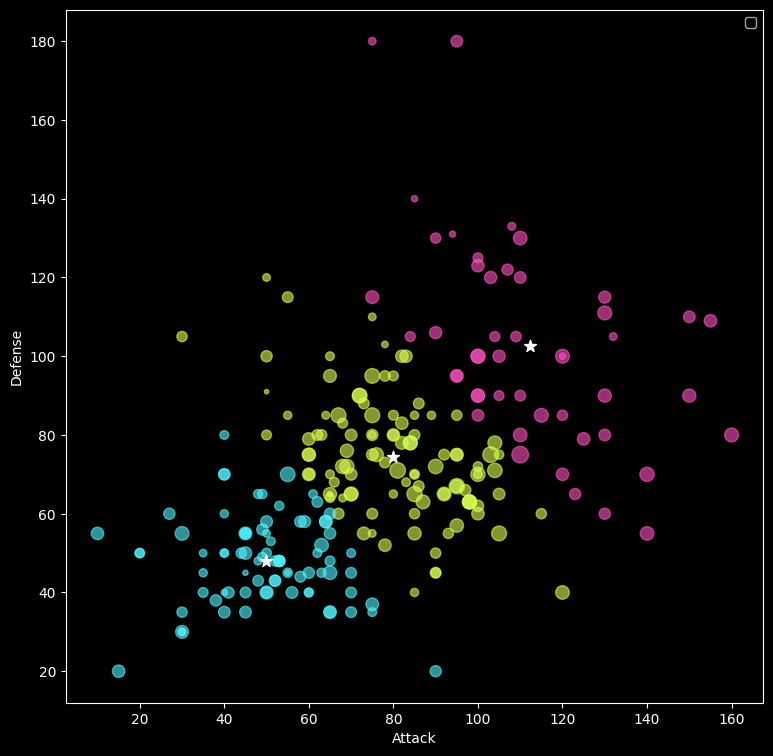

In [93]:
plt.figure(figsize=(9,9))

#data points
plt.scatter(x=df['Attack'], y=df['Defense'], c=df['ClusterColor'], s=df['Speed'], alpha=0.6)
#centroids
plt.scatter(x=cent_x, y=cent_y, c='white', marker='*', s=80)

plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()

Text(0, 0.5, 'Defense')

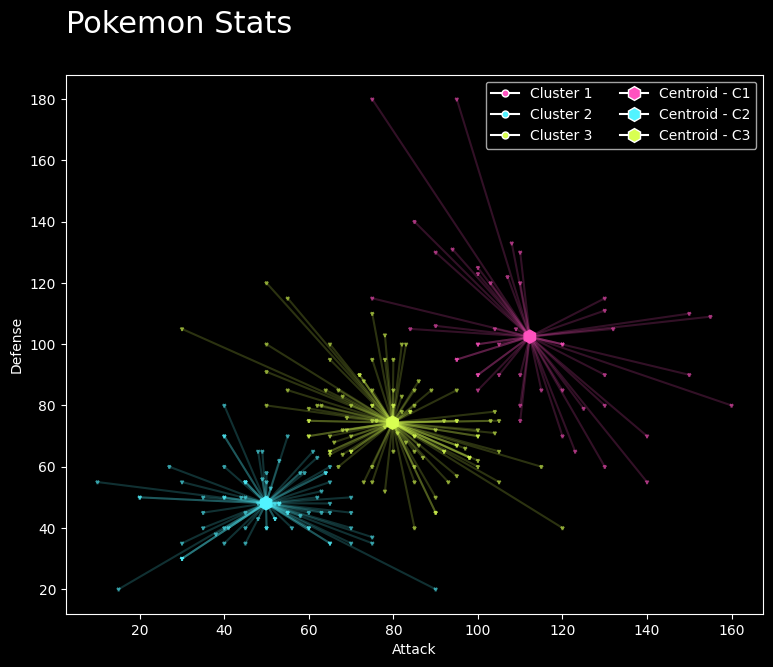

In [105]:
fig, ax = plt.subplots(figsize=(9, 7))

# Scatter plot for data points
plt.scatter(df['Attack'], df['Defense'], c=df['ClusterColor'], alpha=0.6, s=10, marker='1')

# Scatter plot for centroids
plt.scatter(cent_x, cent_y, marker='h', c=color_list, s=90)

# Draw lines from each point to its respective centroid
for _, row in df.iterrows():
    plt.plot([row.Attack, row.CentX], [row.Defense, row.CentY], c=row['ClusterColor'], alpha=0.2)

# Create legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', markerfacecolor=color, markersize=5)
    for i, color in enumerate(color_list)
]
legend_elements += [
    Line2D([0], [0], marker='h', color='w', label=f'Centroid - C{i+1}', markerfacecolor=color, markersize=10)
    for i, color in enumerate(color_list)
]

# Add legend to the plot
plt.legend(handles=legend_elements, loc='upper right', ncol=2)

# Add plot labels and title

plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

Another example of visualization

Text(0, 0.5, 'Defense')

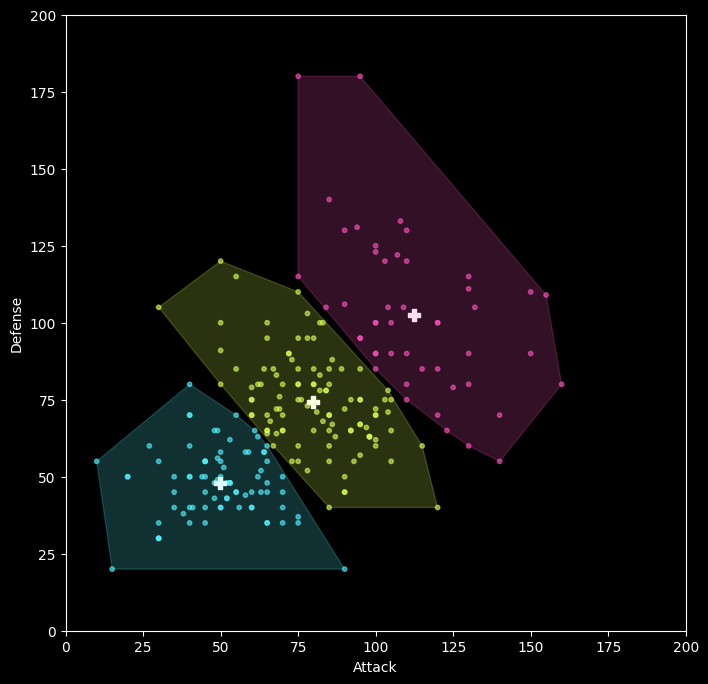

In [107]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df['Attack'], df['Defense'], c=df['ClusterColor'], alpha = 0.6, s=10)
plt.scatter(cent_x, cent_y, marker='P', c='white', s=70)
for i in df['Cluster'].unique():
    points = df[df['Cluster'] == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.2, c=color_list[i])
    
plt.xlim(0,200)
plt.ylim(0,200)
plt.xlabel('Attack')
plt.ylabel('Defense')


### Cluster Summary/Interpretation

In [31]:
df.columns

Index(['Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Cluster', 'CentX', 'CentY', 'ClusterColor'],
      dtype='object')

In [33]:
df.groupby(['Cluster'])[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed']].agg(['mean', 'median', 'min', 'max']).T

Cluster                  0         1           2
Total   mean    557.208333  322.6000  461.858491
        median  540.000000  315.0000  477.500000
        min     325.000000  180.0000  305.000000
        max     770.000000  525.0000  634.000000
HP      mean     83.395833   53.0625   77.047170
        median   89.000000   50.0000   75.000000
        min      30.000000   20.0000   30.000000
        max     115.000000  130.0000  170.000000
Attack  mean    112.270833   49.8750   79.801887
        median  109.500000   50.0000   80.000000
        min      75.000000   10.0000   30.000000
        max     160.000000   90.0000  120.000000
Defense mean    102.479167   48.0750   74.386792
        median  100.000000   48.0000   72.500000
        min      55.000000   20.0000   40.000000
        max     180.000000   80.0000  120.000000
Sp. Atk mean     98.645833   58.0875   85.367925
        median   97.500000   60.0000   85.000000
        min      25.000000   10.0000   15.000000
        max     180.000000  110.0000  159.000000
Sp. Def mean     87.687500   55.7000   74.698113
        median   85.000000   55.0000   75.000000
        min      25.000000   20.0000   25.000000
        max     160.000000  140.0000  129.000000
Speed   mean     72.729167   57.8000   70.556604
        median   76.000000   60.0000   66.500000
        min      20.000000   15.0000   10.000000
        max     145.000000  110.0000  127.000000

## Identifying The Optimal Number of Clusters Using The Elbow Method

In [35]:
df = pd.read_csv(path+'Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [37]:
X = df[['Annual Income (k$)',
       'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


- The elbow method is a popular technique used to determine the optimal number of clusters (k) in a unsupervised clustering algorithm.
- The goal is identify the "elbow" point in the plot of variance explained by clusters vs number of clusters.
-Steps:
    1. Select a range of k-values e.g. 1 to 10 clusters
    2. Compute the clusters for each k-value
    3. Calculate the WCSS (Within-Cluster Sum of Squares) for each k-value cluster. It basically represents the variance within the cluster.
    4. Plot k-values vs WCSS
    5. Identify the **Elbow Point**: It's the value of k where the curve starts to flatten out. The elbow point is the optimal number of k.

In [39]:
# build a blank list of WCSS and k-values
wcss_value_list = []
k_value_list = range(1,11)

for k_val in k_value_list:
    #deploy the model and fit
    kmeans_model = KMeans(n_clusters=k_val, n_init='auto', random_state=10)
    kmeans_model.fit(X)

    #calculate WCSS
    wcss_val = kmeans_model.inertia_

    #append value into wcss list
    wcss_value_list.append(wcss_val)

    #print the outcome of each val
    print(f'k-means model with k-value of: {k_val} \t| WCSS value: {wcss_val:.1f}')


k-means model with k-value of: 1 	| WCSS value: 269981.3
k-means model with k-value of: 2 	| WCSS value: 181363.6
k-means model with k-value of: 3 	| WCSS value: 106348.4
k-means model with k-value of: 4 	| WCSS value: 73679.8
k-means model with k-value of: 5 	| WCSS value: 44448.5
k-means model with k-value of: 6 	| WCSS value: 37442.2
k-means model with k-value of: 7 	| WCSS value: 30552.7
k-means model with k-value of: 8 	| WCSS value: 28709.5
k-means model with k-value of: 9 	| WCSS value: 22122.2
k-means model with k-value of: 10 	| WCSS value: 20080.7


''

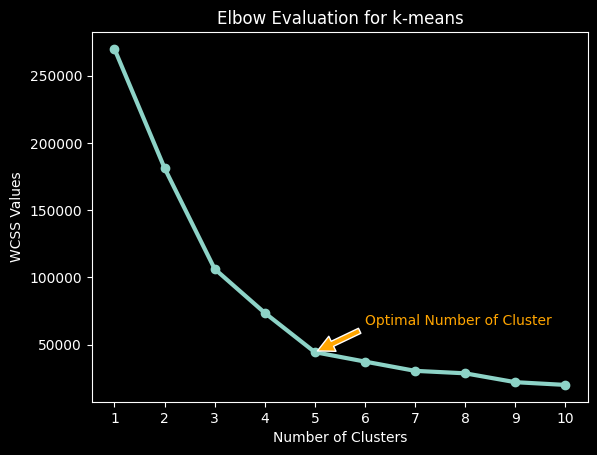

In [55]:
plt.plot(k_value_list, wcss_value_list, linewidth=3)
plt.scatter(k_value_list, wcss_value_list)

point_x = 5
point_y = wcss_value_list[point_x-1]

plt.annotate('Optimal Number of Cluster', xy=(point_x, point_y), xytext=(point_x +1, point_y+20000),
            arrowprops=dict(facecolor='orange', shrink=0.05),
            color='orange'
            )

plt.title('Elbow Evaluation for k-means')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.xticks(k_value_list)
;

In [50]:
point_y

44448.45544793371

Now, we can use the optimal number of clusters (k=5) for our model

In [56]:
kmeans_model = KMeans(n_clusters=5, n_init='auto', random_state=10)
df['Cluster'] = kmeans_model.fit_predict(X)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [63]:
centroids = kmeans_model.cluster_centers_
cent_x = centroids[:,0]
cent_y = centroids[:,1]

df['CentX'] = df['Cluster'].map({0:cent_x[0],
                                1:cent_x[1],
                                2:cent_x[2],
                                3:cent_x[3],
                                4:cent_x[4]})

df['CentY'] = df['Cluster'].map({0:cent_y[0],
                                1:cent_y[1],
                                2:cent_y[2],
                                3:cent_y[3],
                                4:cent_y[4]})

color_list = ['#ff52bf', '#52f3ff', '#d9ff52', '#ffbe86', '#ff4221']

df['ClusterColor'] = df['Cluster'].map({0:color_list[0],
                                        1:color_list[1],
                                        2:color_list[2],
                                        3:color_list[3],
                                        4:color_list[4]})

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,CentX,CentY,ClusterColor
0,1,Male,19,15,39,3,26.304348,20.913043,#ffbe86
1,2,Male,21,15,81,0,25.727273,79.363636,#ff52bf
2,3,Female,20,16,6,3,26.304348,20.913043,#ffbe86
3,4,Female,23,16,77,0,25.727273,79.363636,#ff52bf
4,5,Female,31,17,40,3,26.304348,20.913043,#ffbe86


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


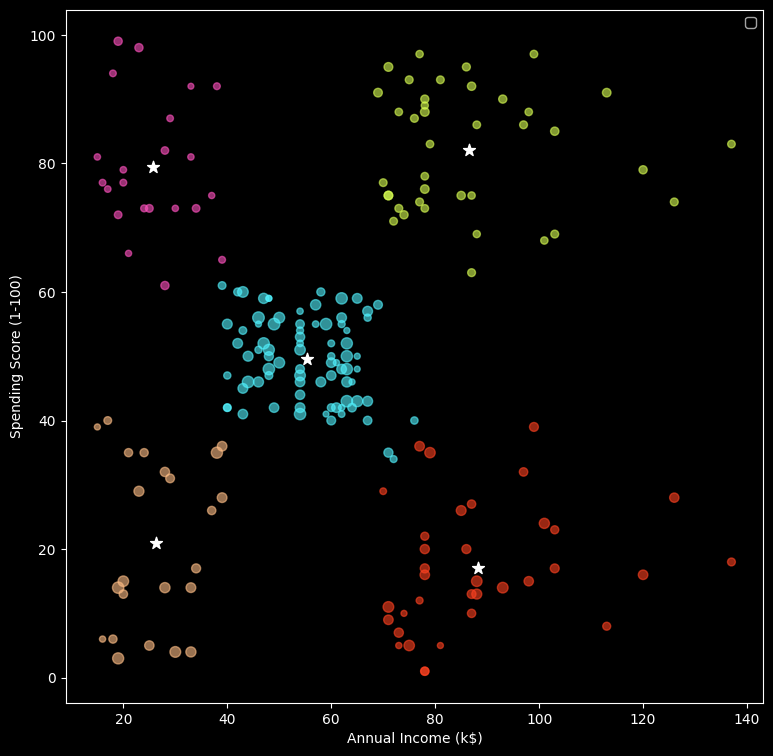

In [66]:
plt.figure(figsize=(9,9))

plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=df['ClusterColor'], s=df['Age'], alpha=0.6)
plt.scatter(x=cent_x, y=cent_y, c='white', marker='*', s=80)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()